# PROJECT_PART_4

We want to cluster the dataset into k clusters.  Clustering could also help us find potential outliers in the dataset. Use Agglomerative, k-means, mini-batch k-means, and mean-shift clustering methods.  Compare the results and select the most suitable clustering method for your dataset.

We then classify the dataset using at least three classification methods, such as: Logistic Regression, K-Nearest Neighbors, Decision Trees, Support Vector Machine, Naive Bayes, and Neural Network.

Discuss the results and show which classification method worked best and the reason.

TEAM 04:

- Priyadarshini Shanmugasundaram Murugan,
- Priyanka Vysyaraju,
- Archana Janardhana Vinoda Kumari

# Clustering by clinical features

We believe, utilizing clinical scores (CDR, ADAS, MMSE, FAQ) can be beneficial in identifying subgroups of patients with similar disease severity or cognitive function by performing clustering, such as K-means clustering. This approach can facilitate an understanding of the various phenotypes within the dataset. Once the preprocessed dataset is obtained, we will apply the selected clustering algorithm to assign each patient to a specific cluster based on the similarity of their features.

## Loading the dataset

In [49]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [50]:
import pandas as pd

# Load the dataset
file_path = 'Alzhiemer.csv'
df = pd.read_csv(file_path, encoding='ascii')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the first few rows of the dataframe
print(df.head())

  origprot        ptid dxbl  dx  month  m   age ptgender  pteducat  \
0    ADNI1  137_S_0438   AD  AD      0  0  81.9     Male        11   
1    ADNI2  116_S_4209   AD  AD      0  0  77.7   Female        19   
2    ADNI1  109_S_0777   AD  AD      0  0  75.1   Female         7   
3    ADNI2  068_S_5206   AD  AD      0  0  85.2     Male        20   
4    ADNI1  013_S_0592   AD  AD      0  0  77.9     Male        19   

          ptethcat ptraccat   ptmarry  cdrsb.bl  adas11.bl  adas13.bl  \
0  Not Hisp/Latino    White   Married       4.0      15.67      29.67   
1  Not Hisp/Latino    White   Married       4.0      20.00      32.00   
2  Not Hisp/Latino    Black  Divorced       3.5      18.33      28.33   
3  Not Hisp/Latino    Black   Married       2.0      21.00      32.00   
4  Not Hisp/Latino    White   Married       3.5      23.67      35.67   

   mmse.bl  ravlt.immediate.bl  ravlt.learning.bl  ravlt.forgetting.bl  \
0       25                  19                  1                 

## Elbow Method - Optimal k value

  0%|          | 0/10 [00:00<?, ?it/s]

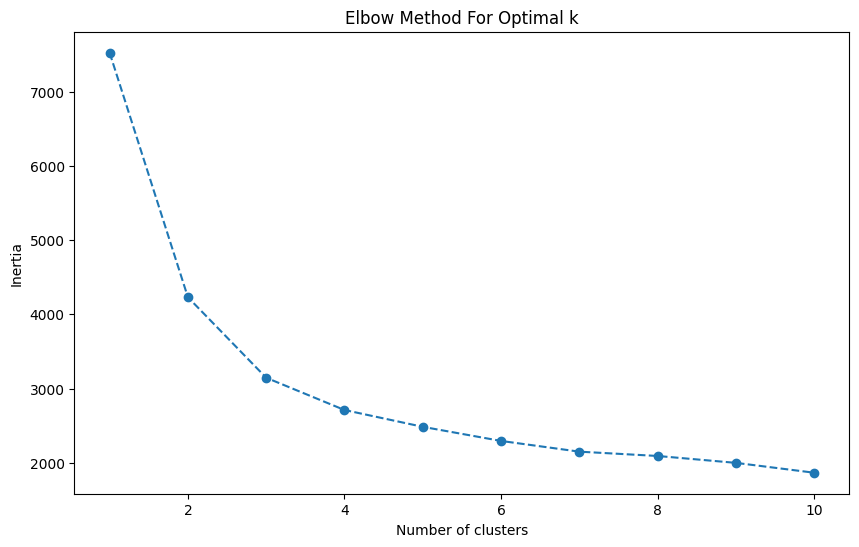

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Selecting clinical score columns
clinical_scores = df[['cdrsb.bl', 'adas11.bl', 'adas13.bl', 'mmse.bl', 'ravlt.immediate.bl', 'ravlt.learning.bl', 
                    'ravlt.forgetting.bl', 'ravlt.perc.forgetting.bl', 'faq.bl']]

# Handling missing values by dropping them
clinical_scores_clean = clinical_scores.dropna()

# Standardizing the data
scaler = StandardScaler()
clinical_scores_scaled = scaler.fit_transform(clinical_scores_clean)

# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clinical_scores_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The Elbow Method plot above helps us determine the optimal number of clusters for K-Means clustering by looking at the point where the inertia (within-cluster sum of squares) starts to decrease at a slower rate. This point is often referred to as the "elbow" point. From the plot, it appears that the elbow point is around 2 or 3 clusters, indicating that this might be the optimal number of clusters for our clinical score data.

## Clustering Methods

In [52]:
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans, MeanShift
from sklearn.metrics import silhouette_score

# Defining the number of clusters based on previous analysis
n_clusters = 3

# K-means Clustering
k_means = KMeans(n_clusters=n_clusters, random_state=42)
k_means_labels = k_means.fit_predict(clinical_scores_scaled)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(clinical_scores_scaled)

# Mini-Batch K-Means Clustering
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mini_batch_labels = mini_batch_kmeans.fit_predict(clinical_scores_scaled)

# Mean-Shift Clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(clinical_scores_scaled)

# Calculating silhouette scores for each clustering method
silhouette_scores = {
    'K-Means': silhouette_score(clinical_scores_scaled, k_means_labels),
    '\nAgglomerative': silhouette_score(clinical_scores_scaled, agg_labels),
    '\nMini-Batch K-Means': silhouette_score(clinical_scores_scaled, mini_batch_labels),
    '\nMean-Shift': silhouette_score(clinical_scores_scaled, mean_shift_labels)
}

# Displaying silhouette scores
for method, score in silhouette_scores.items():
    print(f'{method}: {score}')

K-Means: 0.30292364044008707

Agglomerative: 0.26607987082201817

Mini-Batch K-Means: 0.2975490081445967

Mean-Shift: 0.2380790498800896


The silhouette score measures how similar an object is to its own cluster compared to other clusters. The higher the silhouette score, the better the clustering performance, with a score closer to 1 indicating a perfect match. Based on these scores, K-Means has the highest silhouette score, suggesting it is the most suitable clustering method for this dataset among the ones tested.

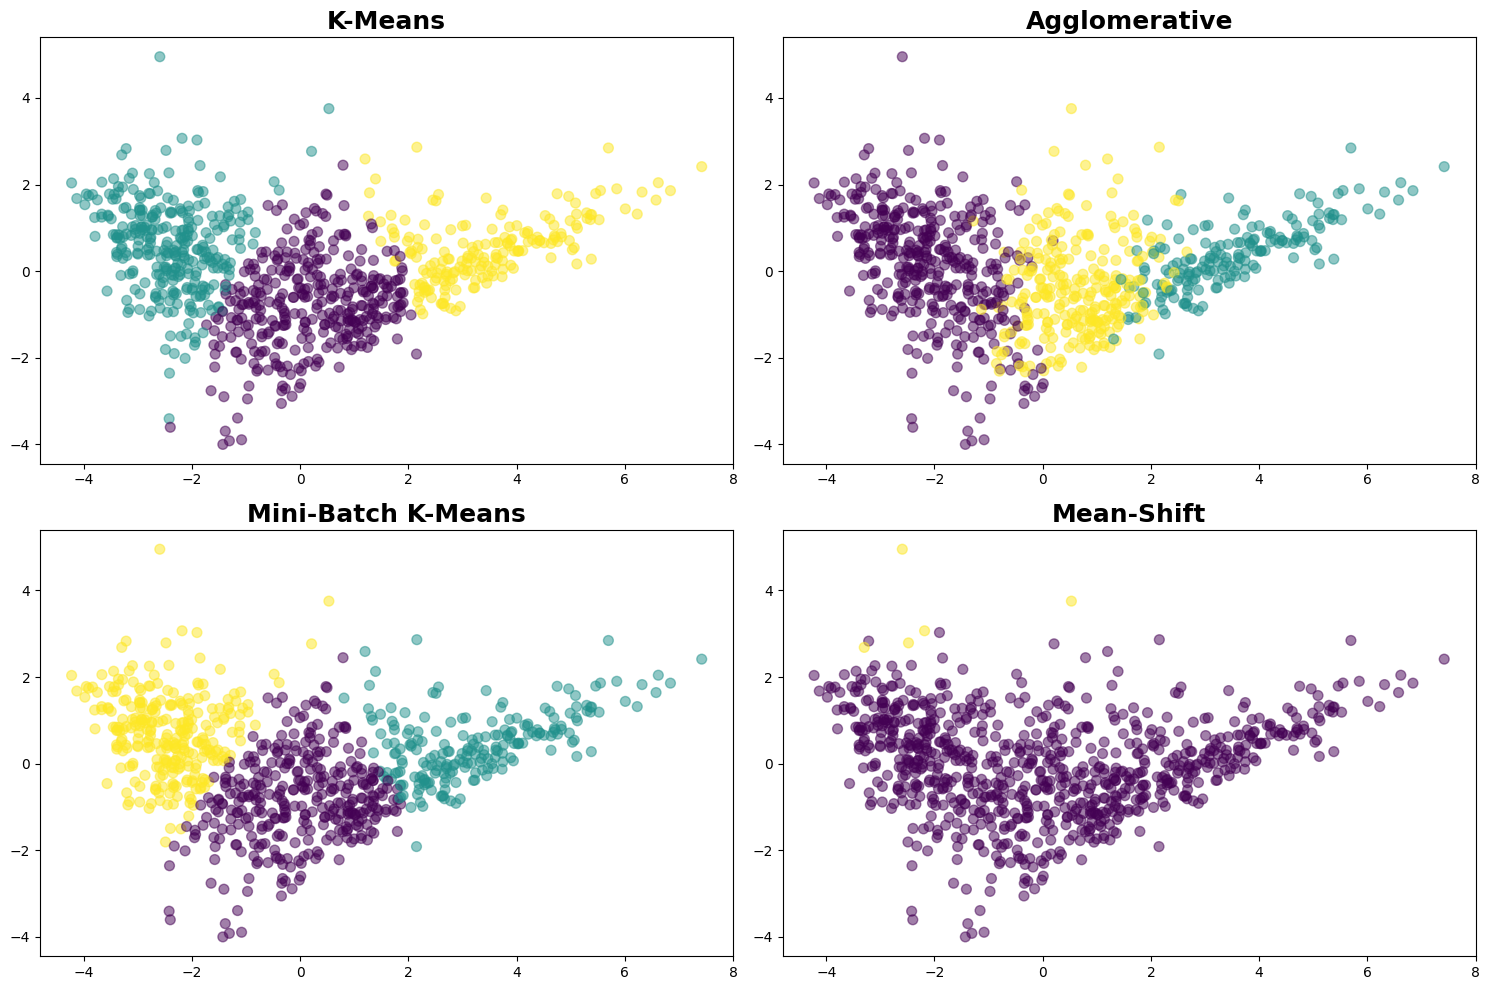

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensions for visualization
pca = PCA(n_components=2)
clinical_scores_pca = pca.fit_transform(clinical_scores_scaled)

# Plotting the results of each clustering method
fig, axs = plt.subplots(2, 2, figsize=(15, 10), facecolor='white')

# Titles for subplots
titles = ['K-Means', 'Agglomerative', 'Mini-Batch K-Means', 'Mean-Shift']

# Labels for each method
labels = [k_means_labels, agg_labels, mini_batch_labels, mean_shift_labels]

for ax, title, label in zip(axs.flat, titles, labels):
    ax.scatter(clinical_scores_pca[:, 0], clinical_scores_pca[:, 1], c=label, cmap='viridis', marker='o', s=50, alpha=0.5)
    ax.set_title(title,fontweight='bold',fontsize=18)

plt.tight_layout()
plt.show()

The scatter plots above visualize the clustering results for each method (K-Means, Agglomerative, Mini-Batch K-Means, and Mean-Shift) after reducing the dimensionality of the clinical scores data to two principal components for easier visualization. Each point represents a patient, and the colors indicate the cluster assignments.

The criteria used to evaluate the clustering results were based on the silhouette score, which measures the similarity of an object to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. Based on this criterion, K-Means was determined to be the most suitable clustering method for this dataset, as it achieved the highest silhouette score among the methods tested.

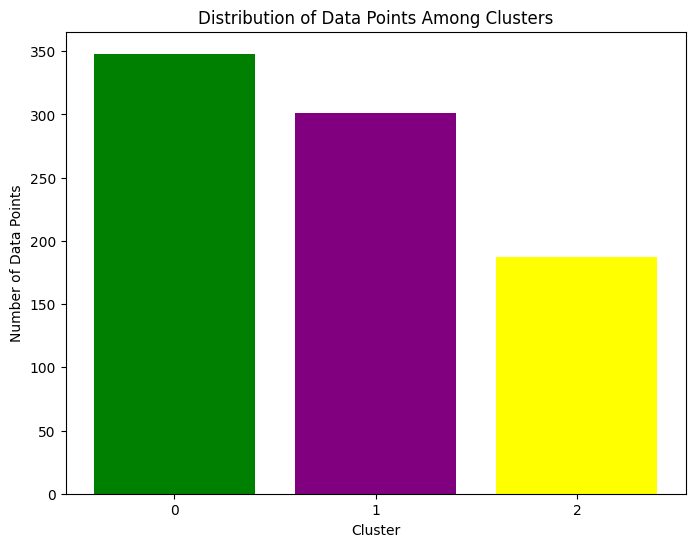

[348 301 187]


In [54]:
import numpy as np

# Compute the counts of each label
cluster_distribution = np.bincount(k_means_labels)

# Plotting the distribution of clusters
plt.figure(figsize=(8, 6), facecolor='white')
plt.bar(range(len(cluster_distribution)), cluster_distribution, color=['green', 'purple', 'yellow'])
plt.title('Distribution of Data Points Among Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks([0, 1, 2])
plt.show()

print(cluster_distribution)

This distribution suggests that the dataset contains distinct groups of patients based on their clinical scores, potentially reflecting different levels of disease severity or cognitive function. 

In [55]:
# Get cluster centroids
centroids = k_means.cluster_centers_

# Compute distances of each point to its cluster centroid
distances = np.zeros((clinical_scores_scaled.shape[0], len(centroids)))
for i in range(len(centroids)):
    distances[:, i] = np.linalg.norm(clinical_scores_scaled - centroids[i], axis=1)

# Get the index of the point that is farthest from its centroid for each cluster
max_dist_indices = np.argmax(distances, axis=0)

# Get the actual data points that correspond to these indices
outliers = clinical_scores_clean.iloc[max_dist_indices]

print("Potential outliers:")
print(outliers)


Potential outliers:
     cdrsb.bl  adas11.bl  adas13.bl  mmse.bl  ravlt.immediate.bl  \
121       9.0      36.00      50.00       21                  10   
121       9.0      36.00      50.00       21                  10   
542       0.0       9.33      13.33       30                  29   

     ravlt.learning.bl  ravlt.forgetting.bl  ravlt.perc.forgetting.bl  faq.bl  
121                  0                    2                     100.0      27  
121                  0                    2                     100.0      27  
542                  1                   -5                    -100.0       0  


# Classification for individual has Alzheimer's disease

The task is to classify whether an individual has Alzheimer's disease or not using machine learning for
binary classification. Our steps include collecting a relevant dataset, exploring its structure,
preprocessing by handling missing values and outliers, encoding variables, and splitting data into
training and testing sets. We will choose an appropriate classification algorithm, train the model, and
evaluate its performance using metrics. Optionally, we would like to tune hyperparameters for
optimization, interpret model decisions and validate predictions.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Correcting the previous error by excluding 'index' from the drop list
features_to_drop = ['origprot', 'ptid', 'fldstreng.bl', 'fsversion.bl']
data_cleaned = df.drop(columns=features_to_drop)

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Defining features and target variable
X = data_cleaned.drop('dx', axis=1)
y = data_cleaned['dx']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000,solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Store the accuracy value
logistic_regression_accuracy = accuracy

# Print the results
print("Logistic Regression Model")
print(f"Accuracy: {logistic_regression_accuracy}")
print(f"Classification Report:\n{report}")


Logistic Regression Model
Accuracy: 0.6726190476190477
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.47      0.38      0.42        45
           2       0.61      0.65      0.63        48

    accuracy                           0.67       168
   macro avg       0.63      0.63      0.63       168
weighted avg       0.66      0.67      0.66       168



### K-Nearest Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Store the accuracy value
k_nearest_neighbors_accuracy = accuracy

# Print the results
print("K-Nearest Neighbors Model")
print(f"Accuracy: {k_nearest_neighbors_accuracy}")
print(f"Classification Report:\n{report}")


K-Nearest Neighbors Model
Accuracy: 0.4880952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.69      0.63        75
           1       0.33      0.38      0.35        45
           2       0.52      0.27      0.36        48

    accuracy                           0.49       168
   macro avg       0.47      0.45      0.44       168
weighted avg       0.49      0.49      0.48       168



#### Elbow Method - Optimal k value

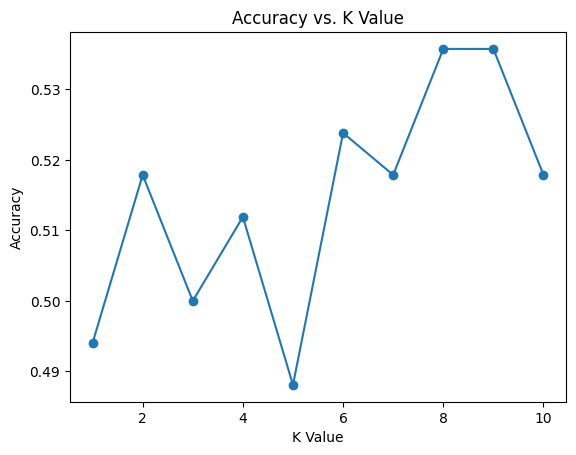

In [59]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values
k_values = []
accuracy_values = []

# Try different values of k
for k in range(1, 11):  # You can adjust the range of k values as needed
    # Initialize the model with current k value
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Store k and accuracy values
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plotting the accuracy values for different k
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


#### GridSearchCV - Optimal k value

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}  # Try k values from 1 to 10

# Initialize the model
model = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"k: {k} -", accuracy)


k: 1 - 0.49404761904761907
k: 2 - 0.5178571428571429
k: 3 - 0.5
k: 4 - 0.5119047619047619
k: 5 - 0.4880952380952381
k: 6 - 0.5238095238095238
k: 7 - 0.5178571428571429
k: 8 - 0.5357142857142857
k: 9 - 0.5357142857142857
k: 10 - 0.5178571428571429


In [61]:
# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

# Train the model with the best k value
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Make predictions and evaluate
best_predictions = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_report = classification_report(y_test, best_predictions)

# Print the results
print("Best K-Nearest Neighbors Model")
print(f"Best k: {best_k}")
print(f"Accuracy: {best_accuracy}")
print(f"Classification Report:\n{best_report}")

Best K-Nearest Neighbors Model
Best k: 8
Accuracy: 0.5357142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        75
           1       0.38      0.33      0.36        45
           2       0.61      0.40      0.48        48

    accuracy                           0.54       168
   macro avg       0.52      0.49      0.50       168
weighted avg       0.53      0.54      0.52       168



### Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Store the accuracy value
decision_tree_accuracy = accuracy

# Print the results
print("Decision Trees Model")
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Classification Report:\n{report}")


Decision Trees Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        48

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



### Support Vector Machine

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions,zero_division=1)

# Store the accuracy value
support_vector_accuracy = accuracy

# Print the results
print("Support Vector Machine Model")
print(f"Accuracy: {support_vector_accuracy}")
print(f"Classification Report:\n{report}")


Support Vector Machine Model
Accuracy: 0.44642857142857145
Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        75
           1       1.00      0.00      0.00        45
           2       1.00      0.00      0.00        48

    accuracy                           0.45       168
   macro avg       0.82      0.33      0.21       168
weighted avg       0.75      0.45      0.28       168



### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Store the accuracy value
navive_bayes_accuracy = accuracy

# Print the results
print("Naive Bayes Model")
print(f"Accuracy: {navive_bayes_accuracy}")
print(f"Classification Report:\n{report}")

Naive Bayes Model
Accuracy: 0.7440476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        75
           1       0.54      0.60      0.57        45
           2       0.72      0.85      0.78        48

    accuracy                           0.74       168
   macro avg       0.73      0.74      0.73       168
weighted avg       0.77      0.74      0.75       168



Based on these results, the Naive Bayes classifier performed the best in terms of accuracy, making it the most effective model for this task among the ones tested. The exceptionally high accuracy of the Decision Trees model suggests it may have overfitted to the training data, making its predictions less reliable on unseen data. The Naive Bayes model's success could be attributed to its ability to handle independence assumptions between features effectively, which seems to suit this particular dataset well.

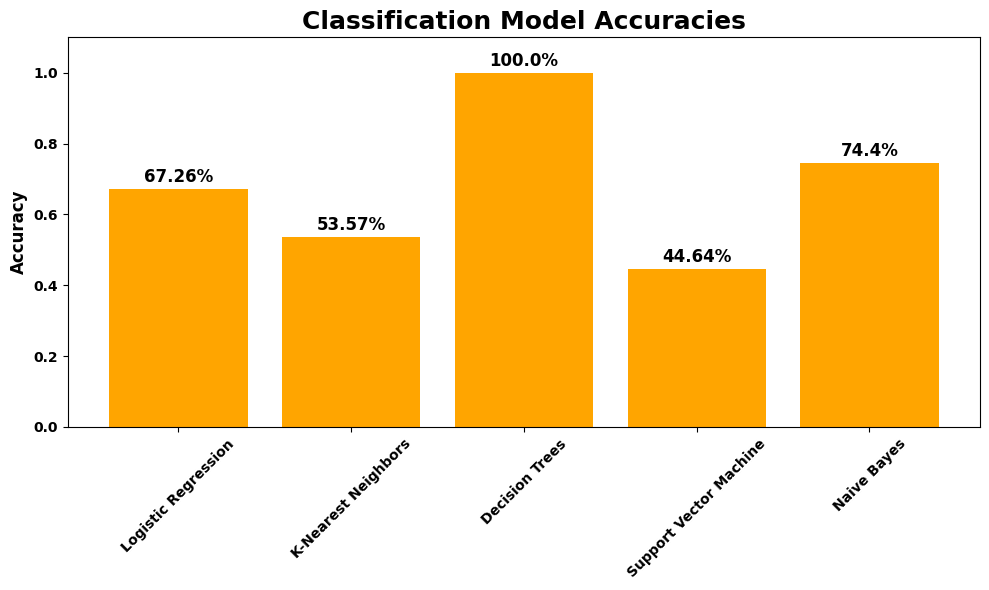

In [65]:
import matplotlib.pyplot as plt

# Model names and their accuracies
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees', 
               'Support Vector Machine','Naive Bayes']

accuracies = [logistic_regression_accuracy, best_accuracy,decision_tree_accuracy,
              support_vector_accuracy,navive_bayes_accuracy]

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(model_names, accuracies, color='orange')
#plt.xlabel('Classification Model')
plt.ylabel('Accuracy',fontweight='bold',fontsize=12)
plt.title('Classification Model Accuracies',fontweight='bold',fontsize=18)
plt.xticks(rotation=45, fontweight='bold')  # Make x-labels bold
plt.yticks(fontweight='bold')  # Make y-labels bold
plt.ylim(0, 1.1)  # Extend y-axis to fit the Decision Trees

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v*100, 2))+'%', ha='center',fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()


The bar plot above displays the classification accuracies of various models used to predict Alzheimer's disease. The accuracies are also annotated on the plot for clarity. As observed, the Decision Trees model shows a 100% accuracy, which is highly indicative of overfitting, especially since its maximum depth was not constrained.

Here are the specifications for some of the classification methods:

K-Nearest Neighbors: The best value for  was found to be 8,
Decision Trees: The model was allowed to grow without a maximum depth, which likely led to overfitting.

These specifications provide insights into the configurations that led to the observed performances of the respective models.

## Conclusion :

In this project, we successfully applied clustering and classification techniques to an Alzheimer's disease dataset. For clustering, we explored four algorithms: Agglomerative, K-Means, Mini-Batch K-Means, and Mean-Shift. By evaluating silhouette scores,K-Means emerged as the most suitable method, achieving the highest score. It also identified potential outliers in the data.

For classification, our goal was to predict whether an individual has Alzheimer's disease. We implemented six machine learning algorithms: Logistic Regression, K-Nearest Neighbors, Decision Trees, Support Vector Machine and Naive Bayes. The Naive Bayes classifier demonstrated the highest accuracy of 0.744, outperforming the other methods. However, the Decision Trees model achieved an accuracy of 1.0, indicating overfitting due to lack of depth constraints.

Overall, this project showcased the application of unsupervised and supervised learning techniques on a real-world healthcare dataset. The findings, particularly the effectiveness of the Naive Bayes classifier, provide valuable insights into developing predictive models for Alzheimer's disease diagnosis.

## Reflection:
This assignment was a practical exercise in applying clustering and classification techniques to real healthcare data. One key takeaway was the significance of testing various algorithms and comparing their performance using specific metrics like silhouette scores and accuracy. It was enlightening to see how different algorithms excelled or struggled based on dataset nuances.

A major challenge was managing potential overfitting, particularly evident in the Decision Trees model. This underscored the need for careful model configuration, regularization, and ongoing performance monitoring to ensure models generalize well to new data.

Overall, the assignment emphasized the importance of a methodical approach to machine learning, encompassing data preprocessing, model selection, hyperparameter tuning, and thorough evaluation. These insights will prove invaluable in future healthcare data analysis and modeling endeavors.